### Handling netcdf files in python

We can use the netCDF4 module to handle netcdf files in Python. See https://unidata.github.io/netcdf4-python/.

A very convenient tool to quickly visualize a netcdf file is ncview: http://meteora.ucsd.edu/~pierce/ncview_home_page.htmlhttp://meteora.ucsd.edu/~pierce/ncview_home_page.html

An example .nc file is provided in this repository. This notebook shows how to read it in and process it for further analysis.

In [1]:
import numpy as np
import pandas as pd
from netCDF4 import Dataset
%matplotlib inline

The `Dataset` class can be used for reading in a netcdf file. 

In [2]:
data = Dataset('P_2006_MSWEP.nc', 'r', format='NETCDF4')
type(data)

netCDF4._netCDF4.Dataset

Inspect the dataset. The variable 'P' contains the global `MSWEP` precipitation from the year 2006.

In [3]:
data.variables

OrderedDict([(u'P', <type 'netCDF4._netCDF4.Variable'>
              float64 P(time, lon, lat)
              unlimited dimensions: 
              current shape = (365, 360, 180)
              filling on, default _FillValue of 9.96920996839e+36 used)])

Extract the variable as a numpy array. The array has three dimensions: (time, longitude, latitude)

In [4]:
precip = data.variables['P'][::]
precip.shape

(365, 360, 180)

Let's plot the data from one day:

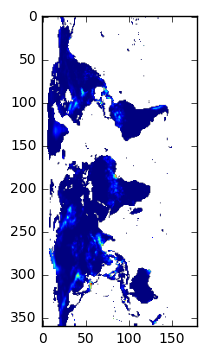

In [5]:
import matplotlib.pyplot as plt
plt.imshow(precip[200])

In the netcdf file, the y-axis is the longitude and the x-axis the latitude. Let's transpose the array to fix this: 

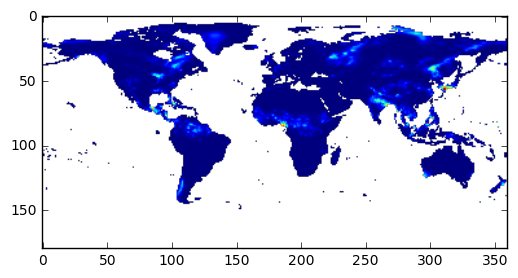

In [6]:
precip_t = np.transpose(precip, axes=[0,2,1])
plt.imshow(precip_t[200])

In the netcdf files, the latitude and longitude are numerical indexes going from 0 to 180 and from 0 to 360, respectively. We can define two dicts to map these indexes to the real latitude and longitude values:

In [60]:
# Lat, lon mappings
mappingLon = dict(zip(np.arange(0,360,1), np.arange(-179.5,180.5,1)))
mappingLat = dict(zip(np.arange(179,-1,-1), np.arange(-89.5,90.5,1)))

These mappings can be used to convert one temporal slice of the data from the wide numpy format to a long format with three columns (lat, lon, value) using pandas:

In [93]:
DF = pd.DataFrame(precip_t[200])
DF.head()

,0,1,2,3,4,5,6,7,8,9,...,350,351,352,353,354,355,356,357,358,359
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
DF['lat'] = DF.index
DF_long = pd.melt(DF, id_vars = ['lat'], var_name='lon', value_name='precipitation')
DF_long.head()

,lat,lon,precipitation
0,0,0,NaN
1,1,0,NaN
2,2,0,NaN
3,3,0,NaN
4,4,0,NaN


In [102]:
DF_long['lon'] = DF_long['lon'].map(mappingLon)
DF_long['lat'] = DF_long['lat'].map(mappingLat)

In [103]:
DF_long.head()

,lat,lon,precipitation
0,89.5,-179.5,NaN
1,88.5,-179.5,NaN
2,87.5,-179.5,NaN
3,86.5,-179.5,NaN
4,85.5,-179.5,NaN


A dataframe in this format can visualized on the world map with the code from the [plotting tutorial](https://github.com/sdcubber/SAT-EX/blob/master/plot_tutorial/plot_tutorial.ipynb). 
